In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import json

In [119]:
config_path = "config.json"
out_path = "out_euler.csv"
config = {
    "dt": 0.01,
    "x_0": 1,
    "v_0": 0,
    "w": 1, 
    "n_steps": 10000,
    "solver": "euler"
}

with open(config_path, 'w') as f:
    json.dump(config, f)

subprocess.run(['build/main', config_path, out_path])
df_euler = pd.read_csv(out_path)

out_path = "out_heun.csv"
config["solver"] = "heun"
config["dt"] = 0.2
config["n_steps"] = 500

with open(config_path, 'w') as f:
    json.dump(config, f)

subprocess.run(['build/main', config_path, out_path])
df_heun = pd.read_csv(out_path)

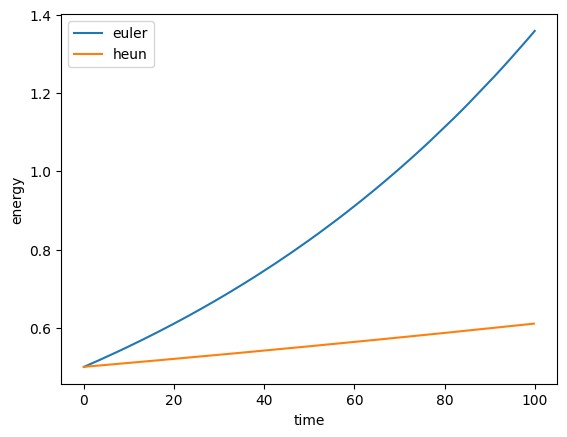

In [120]:
plt.plot(df_euler.time, df_euler.energy, label="euler")
plt.plot(df_heun.time, df_heun.energy, label="heun")
plt.xlabel('time')
plt.ylabel('energy')
plt.legend()

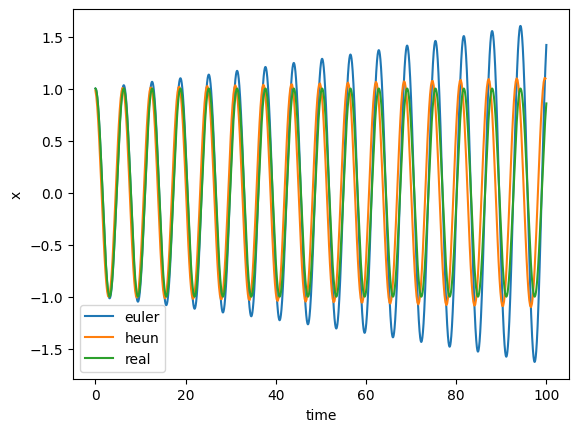

In [121]:
plt.plot(df_euler.time, df_euler.position, label="euler")
plt.plot(df_heun.time, df_heun.position, label="heun")
plt.plot(df_euler.time, np.cos(df_euler.time), label="real")
plt.xlabel('time')
plt.ylabel('x')
plt.legend()

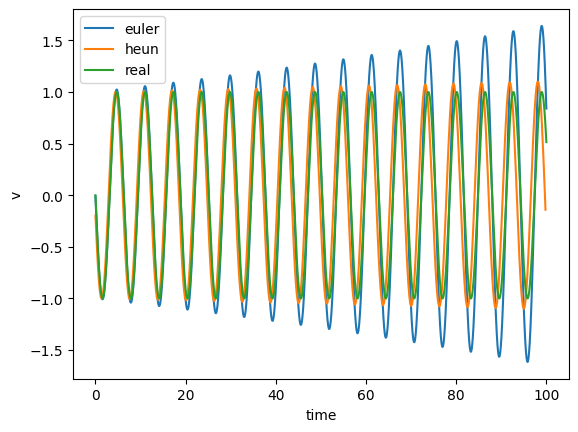

In [113]:
plt.plot(df_euler.time, df_euler.velocity, label="euler")
plt.plot(df_heun.time, df_heun.velocity, label="heun")
plt.plot(df_euler.time, -np.sin(df_euler.time), label="real")
plt.xlabel('time')
plt.ylabel('v')
plt.legend()

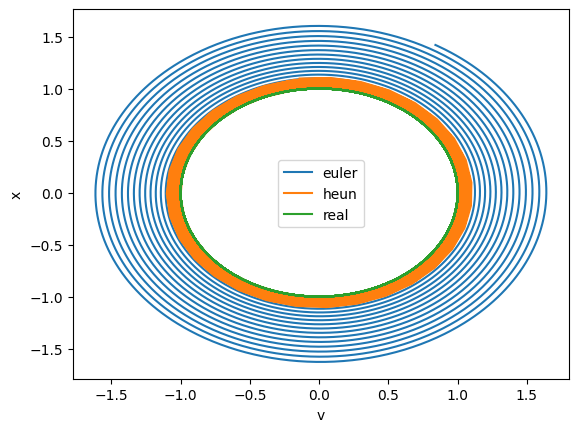

In [114]:
plt.plot(df_euler.velocity, df_euler.position, label="euler")
plt.plot(df_heun.velocity, df_heun.position, label="heun")
plt.plot(-np.sin(df_euler.time), np.cos(df_euler.time), label="real")
plt.xlabel('v')
plt.ylabel('x')
plt.legend()